# EDA

In [1]:
# Import libraries for EDA
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


#### Load and Look at Data

In [2]:
# load dataset
lyft_csv = 'complete_dataset.csv'


df = pd.read_csv(lyft_csv)

# check the shape of the dataset
print(df.shape)
df.head(10) 


df_info = df.info() # summary of the dataset (columns, rows, data types, memory usage, etc.)
df_summary = df.describe() # summary statistics for numerical columns

# check for missing values
null_vals = df.isnull().sum() # no missing values

#check for duplicates
duplicates = df.duplicated().sum() # no duplicates


FileNotFoundError: [Errno 2] No such file or directory: 'complete_dataset.csv'

In [3]:
# Snow is null for all observations so we will drop this column
df = df.drop(columns=['snow'])

# change inf values to nan for easier handling
df.replace([np.inf, -np.inf], np.nan, inplace=True)

#### Generate sweetviz dataset report

In [95]:
# intstall sweetviz
# !pip install sweetviz


# Generate comprehensive report on the dataset using sweetviz
import sweetviz as sv
report = sv.analyze(df)
report.show_html('Lyft_ride_report.html')



Report Lyft_ride_report.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


#### Target Variable Distribution

<AxesSubplot: >

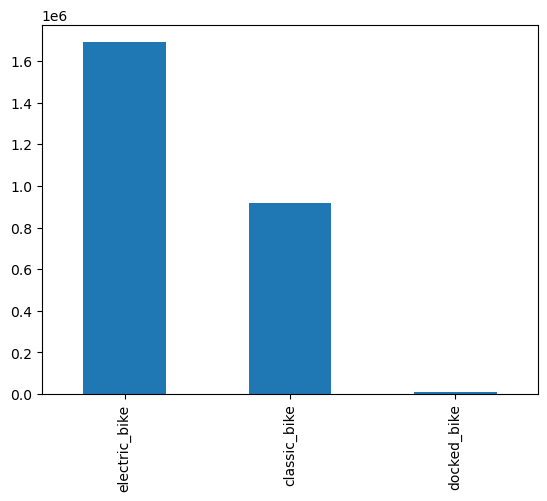

In [4]:

df['rideable_type'].value_counts(normalize=True) # 0: docked_bike, 1: electric_bike
df['rideable_type'].value_counts().plot.bar() # 0: docked_bike, 1: electric_bike



## Predictor and Target Variable Exploration

#### Ride Type by of Time of Day

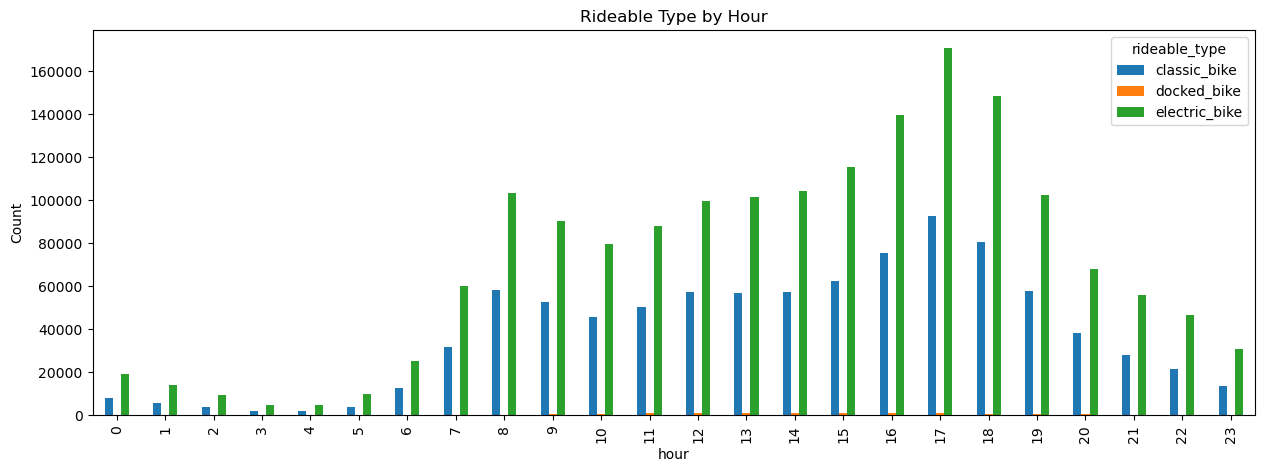

In [5]:


# view column names and data types in single dataframe
df.dtypes # all columns are numerical

# create duration column in minutes using started_at and ended_at columns
df['started_at'] = pd.to_datetime(df['started_at']) # convert started_at column to datetime
df['ended_at'] = pd.to_datetime(df['ended_at']) # convert ended_at column to datetime
df['duration'] = (df['ended_at'] - df['started_at']).astype('timedelta64[m]') # create duration column in minutes

# explore relationship between start_at time and rideable_type:
# create hour column from started_at column
df['hour'] = df['started_at'].dt.hour

# create a pivot table to view the relationship between hour and rideable_type
hour_rideable_type = df.pivot_table(index='hour', columns='rideable_type', values='duration', aggfunc='count')
hour_rideable_type.plot.bar(figsize=(15,5))
plt.ylabel('Count')
plt.title('Rideable Type by Hour')
plt.show()





#### Ride Type Duration

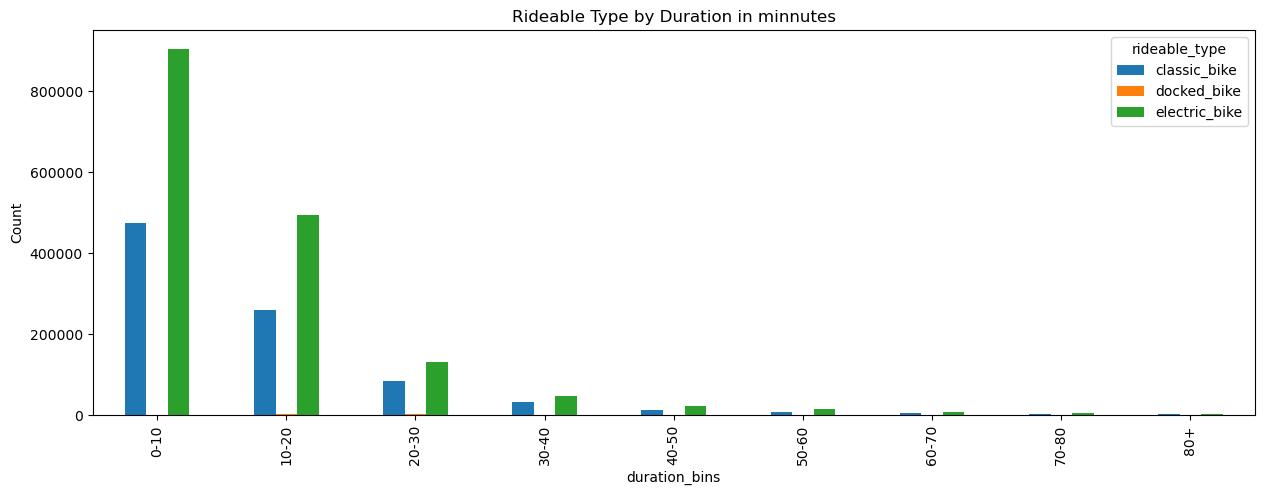

In [6]:
# Create a pivot table to view the relationship between duration (in minutes) and rideable_type, duration has high cardinality so we will bin the values

# create bins for duration (in minutes)
bins = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90]
labels = ['0-10', '10-20', '20-30', '30-40', '40-50', '50-60', '60-70', '70-80', '80+']
df['duration_bins'] = pd.cut(df['duration'], bins=bins, labels=labels)

# create a pivot table to view the relationship between duration and rideable_type
duration_rideable_type = df.pivot_table(index='duration_bins', columns='rideable_type', values='duration', aggfunc='count')
duration_rideable_type.plot.bar(figsize=(15,5))
plt.ylabel('Count')
plt.title('Rideable Type by Duration in minnutes')
plt.show()


#### Stations and Journeys vs Rideable Type

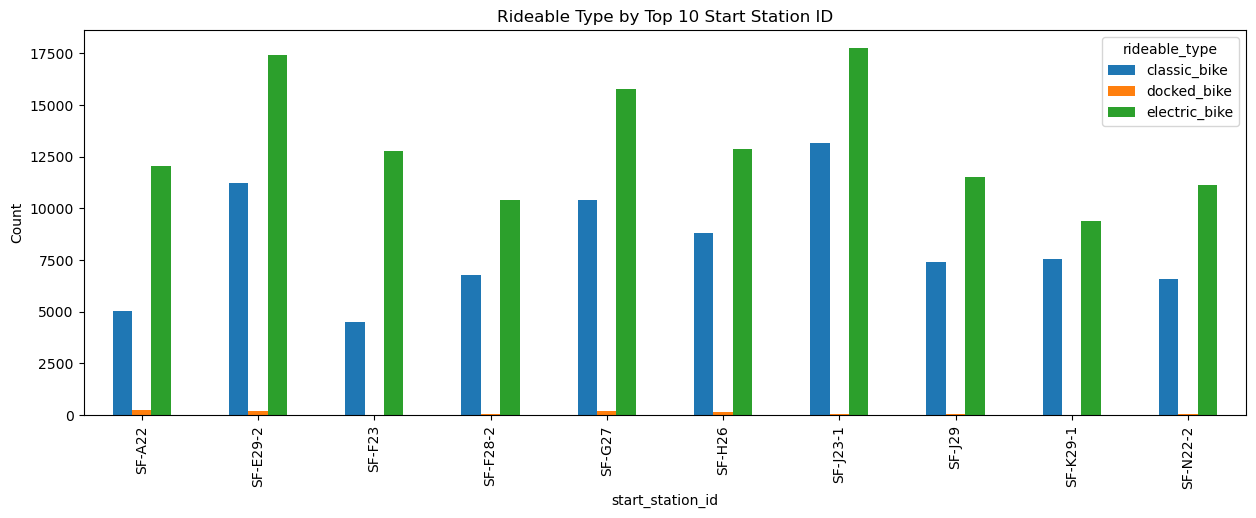

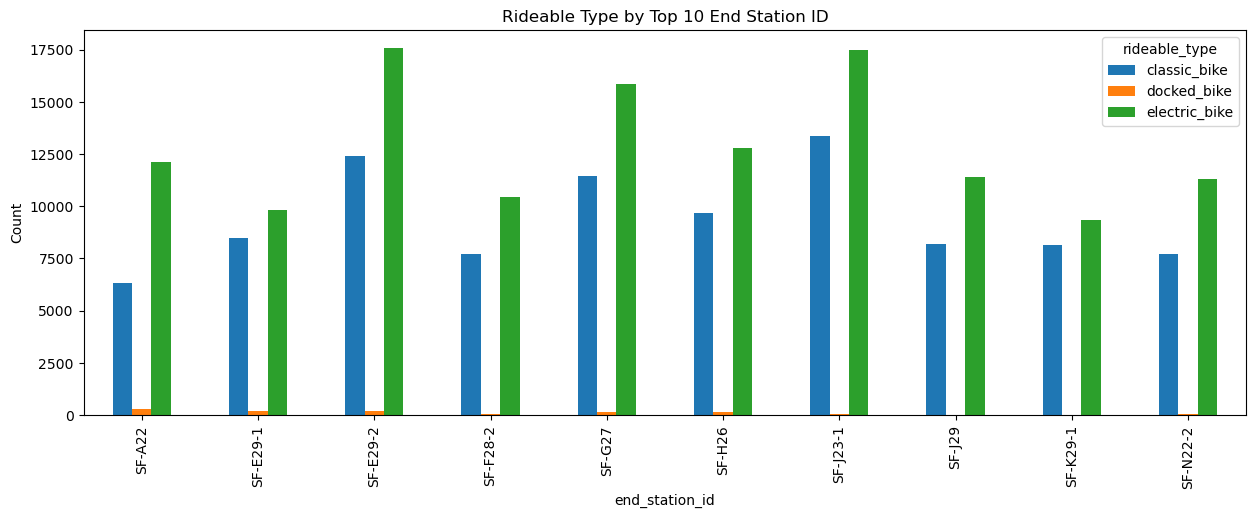

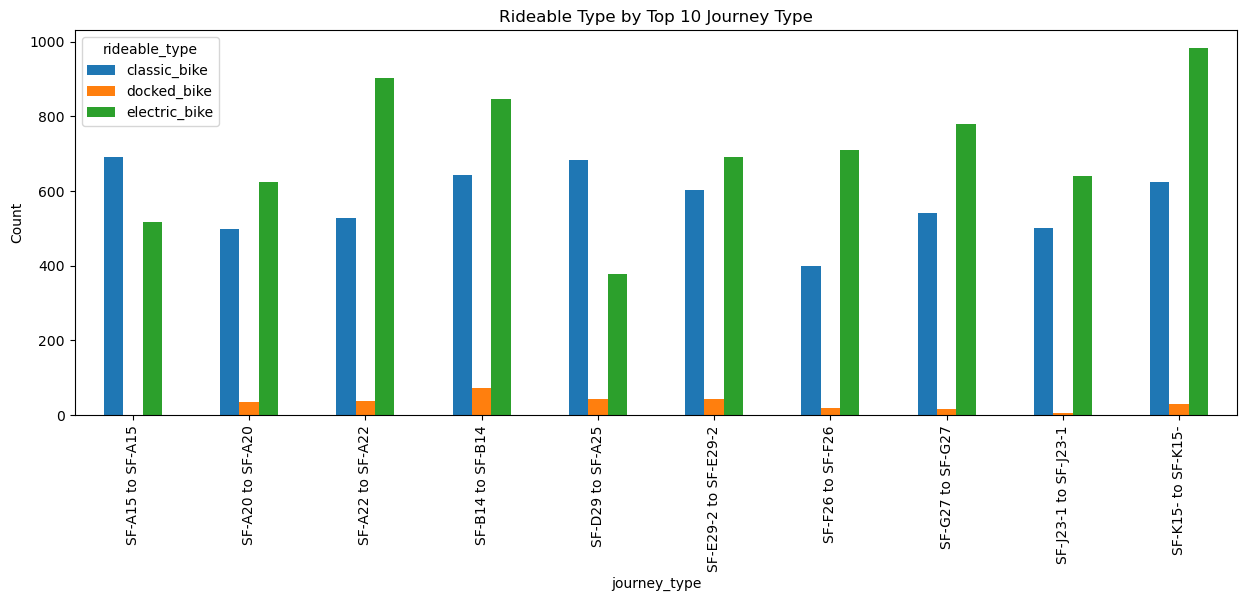

In [7]:
## Using start_station ID and end_station ID we can see the most popular start and end locations and rideable type
# Find the top 10 start stations by count
top_10_stations = df['start_station_id'].value_counts().head(10).index

# Filter the DataFrame to only include the top 10 start stations
filtered_df = df[df['start_station_id'].isin(top_10_stations)]

# exlude nan values
filtered_df = filtered_df[filtered_df['start_station_id'] != 'nan']

# Pivot table
start_station_rideable_type = filtered_df.pivot_table(index='start_station_id', columns='rideable_type', values='duration', aggfunc='count')

# Plotting
start_station_rideable_type.plot.bar(figsize=(15,5))
plt.ylabel('Count')
plt.title('Rideable Type by Top 10 Start Station ID')
plt.show()

# Find the top 10 end stations by count
top_10_stations = df['end_station_id'].value_counts().head(10).index

# Filter the DataFrame to only include the top 10 end stations
filtered_df = df[df['end_station_id'].isin(top_10_stations)]

# exlude nan values
filtered_df = filtered_df[filtered_df['end_station_id'] != 'nan']

# Pivot table
end_station_rideable_type = filtered_df.pivot_table(index='end_station_id', columns='rideable_type', values='duration', aggfunc='count')

# Plotting
end_station_rideable_type.plot.bar(figsize=(15,5))
plt.ylabel('Count')
plt.title('Rideable Type by Top 10 End Station ID')
plt.show()


# Now create a column showing journey types (start and end station ID) and rideable type (excluding nan values)
df['journey_type'] = df['start_station_id'].astype(str) + ' to ' + df['end_station_id'].astype(str)

# Exclude rows where either start_station_id or end_station_id is NaN
df = df[pd.notna(df['start_station_id']) & pd.notna(df['end_station_id'])]

# Find the top 10 journey types by count
top_10_journeys = df['journey_type'].value_counts().head(10).index

# Filter the DataFrame to only include the top 10 journey types
filtered_df = df[df['journey_type'].isin(top_10_journeys)]

# Pivot table
journey_type_rideable_type = filtered_df.pivot_table(index='journey_type', columns='rideable_type', values='duration', aggfunc='count')

# Plotting
journey_type_rideable_type.plot.bar(figsize=(15,5))
plt.ylabel('Count')
plt.title('Rideable Type by Top 10 Journey Type')
plt.show()




#### Ridable Type by Day of the Week


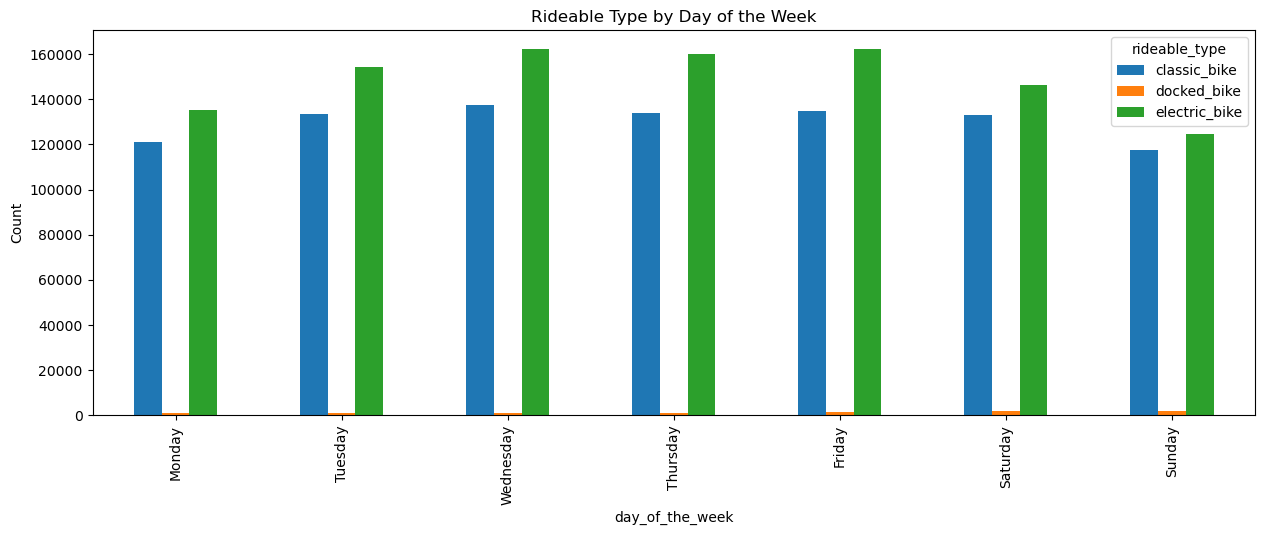

In [8]:
# Convert 'day_of_the_week' column to a categorical type with a specific order
order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
df['day_of_the_week'] = pd.Categorical(df['day_of_the_week'], categories=order, ordered=True)

# Create a pivot table
day_rideable_type = df.pivot_table(index='day_of_the_week', columns='rideable_type', values='duration', aggfunc='count')

# Since the dataframe is already ordered by 'day_of_the_week', you can directly plot it
day_rideable_type.plot.bar(figsize=(15,5))
plt.ylabel('Count')
plt.title('Rideable Type by Day of the Week')
plt.show()

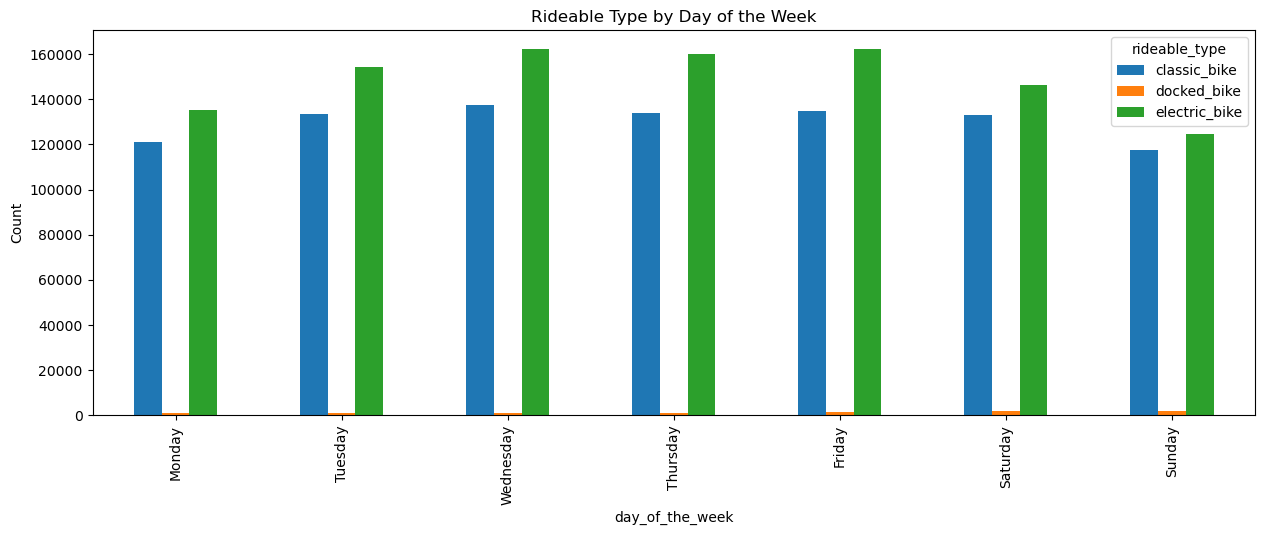

In [9]:
# Convert 'day_of_the_week' column to a categorical type with a specific order
order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
df['day_of_the_week'] = pd.Categorical(df['day_of_the_week'], categories=order, ordered=True)

# Create a pivot table
day_rideable_type = df.pivot_table(index='day_of_the_week', columns='rideable_type', values='duration', aggfunc='count')

# Since the dataframe is already ordered by 'day_of_the_week', you can directly plot it
day_rideable_type.plot.bar(figsize=(15,5))
plt.ylabel('Count')
plt.title('Rideable Type by Day of the Week')
plt.show()

#### Correlation Analysis ####  

C:\Users\seanc\AppData\Local\Temp\ipykernel_21112\1431031539.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


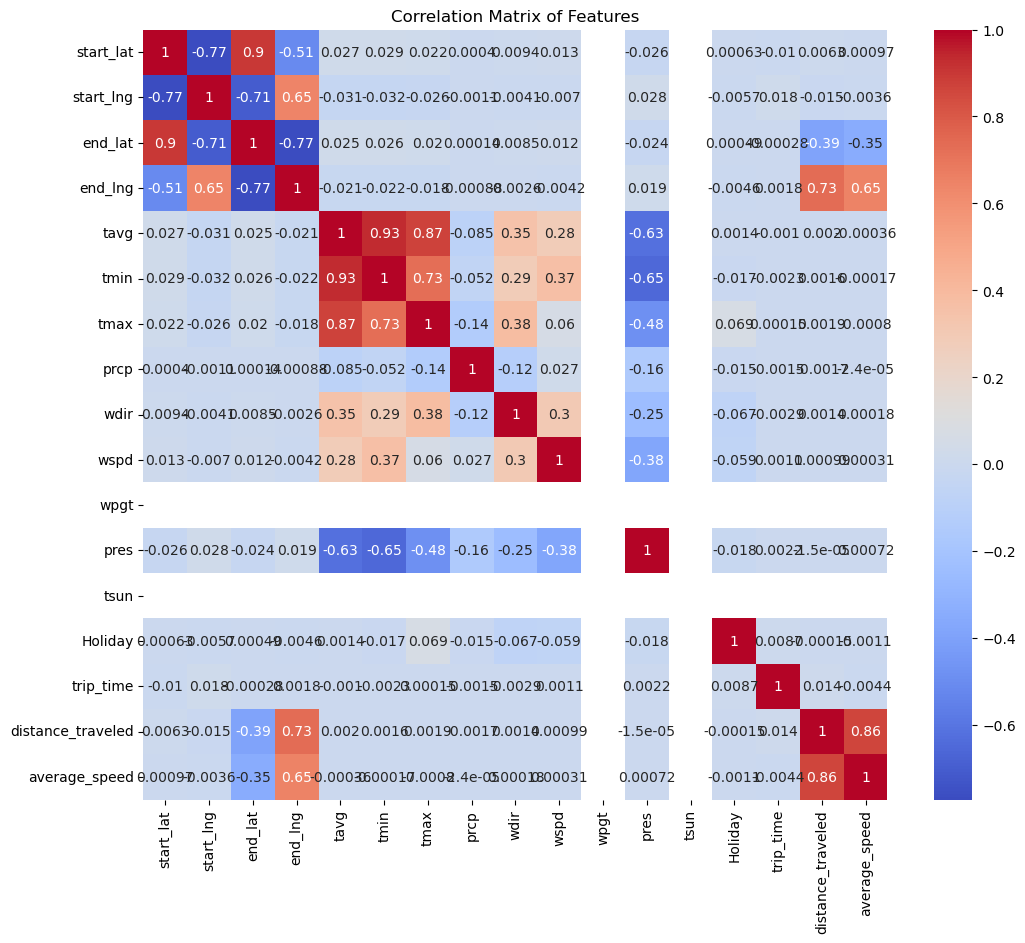

In [8]:
correlation_matrix = df.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation Matrix of Features")
plt.show()
